In [3]:
import numpy as np
import scipy.linalg as sl
from enterprise.signals import (gp_signals, parameter, signal_base, utils,
                                white_signals)
import healpy as hp

In [16]:
class SimplePulsar:
   
    def __init__(self, psrloc, psrname, rot_freq = 200, spindown = 1.5Ntoas = 1000, tmin_mjd=54000):
        """
        Simple model of an idealized pulsar with a location, rotational 
        frequency and a name. Also allowed for some white noise residuals and 
        residuals from a signal

        :param psrloc: a tuple containing [theta,phi] of the pulsar
        :param name: what to name the pulsar
        :param rot_freq: [Hz] the rotational frequency of the pulsar
        :param tmin_mjd: [mjd] the first toa of the pulsar
        """
            
        self.theta = psrloc[0]
        self.phi = psrloc[1]
        self.name = psrname

        self.base_toas = np.arange(0, Ntoas) * 1/rot_freq + tmin_mjd * 24*3600
        self.wn_resids = []
        self.signal_resids = []
        
    
    
    def add_wn(self, wn_level = 200e-9):
        """
        Adds Gaussian WN to the pulsars white noise residuals

        :param wn_level: [s] The level of WN used as the stdev of the gaussian 
        """    
        
        gaussian_noise = np.random.normal(loc = 0.0, scale = wn_level, size=len(self.base_toas))
        self.wn_resids.append(gaussian_noise)
    
    def add_bwm(self, bwm_loc, bwm_pol, bwm_strain, bwm_epoch):
        """
        Adds BWM residuals based on a location, polariztion, intrinsic strain and burst epoch
        
        :param bwm_loc: [theta, phi] the sky-location of the burst [theta, phi]
        :param bwm_pol: [psi] the polariztion angle of the burst 
        :param bwm_strain: [dimensionless strain] intrinsic strain of the memory
        :param bmw_epoch: [mjd] the time at which the burst occurs
        """
        
        
        bwm_epoch_sec = bwm_epoch * 24 * 3600
        psrpos = hp.ang2vec(self.theta, self.phi)
        apc = utils.create_gw_antenna_pattern(psrpos, bwm_loc[0], bwm_loc[1])
        fp, fc = apc[0], apc[1]
        pol = np.cos(2*gwpol) * fp + np.sin(2 * gw_pol) * fc
        
        bwm_signal = pol * bwm_strain * np.heaviside(self.base_toas - bwm_epoch_sec, 0.5) * (base_toas - bwm_epoch_sec)
        self.signal_resids.append(bwm_signal)
       
    def fit_quadratic()
    
    
        
        

In [ ]:
def SimpleFpFe:
    def __init__(self, simple_pulsars,)

[array([-8.15618518e-08,  2.52523178e-07, -1.69528797e-08, -5.77654681e-08,
         1.87172789e-07,  3.25082810e-07, -7.85828980e-08, -1.85039733e-08,
        -3.41736024e-07, -2.34859575e-07, -2.78730214e-07,  2.34075966e-08,
         8.85175759e-08, -2.22916932e-07,  3.02843006e-08, -1.65744877e-07,
        -2.95658454e-07,  3.94283479e-07,  3.53403995e-07, -8.51969828e-08,
        -2.60681783e-07, -1.43450432e-07,  4.36743246e-08, -1.24343614e-07,
        -1.21237497e-07,  3.19784719e-07,  1.36002595e-07, -1.68058685e-08,
        -2.57555005e-08,  1.09892653e-07,  1.37733049e-07, -2.09844145e-07,
        -1.30188021e-07,  1.77510397e-07, -9.60981509e-08,  5.29222321e-08,
        -2.30236703e-08, -2.52259399e-07, -9.25376379e-08,  1.93467829e-07,
         8.17326768e-08, -1.71644457e-07,  1.15226520e-07,  1.97695052e-07,
         2.93731509e-07, -3.97172879e-08,  1.45587543e-07,  1.27185379e-07,
        -1.22493459e-07, -2.20432098e-07, -4.38123374e-08, -9.08064148e-08,
        -7.4

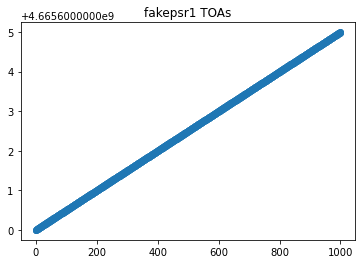

In [17]:
import matplotlib.pyplot as plt

testpsr = SimplePulsar([np.pi/2, 3 * np.pi/4], 'fakepsr1', )
plt.scatter(np.arange(len(testpsr.base_toas)), testpsr.base_toas, label= 'base toas')
plt.title("{} TOAs".format(testpsr.name))

testpsr.add_wn()
testpsr.wn_resids